In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
housing_data = pd.read_csv('housingFin.csv',index_col=0)

In [7]:
housing_data.shape

(1043, 7)

In [8]:
housing_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Adjustment Factor',
       'Adjustment Type'],
      dtype='object')

In [0]:
housing_data = housing_data.drop(['Adjustment Factor','Adjustment Type','Volume'],axis=1)

In [0]:
moving_10 = housing_data['Close'].rolling(10).mean()

In [0]:
def bul_eglf(lst_0,lst_1,lst_2):    
    
    O_0,H_0,L_0,C_0=lst_0[0],lst_0[1],lst_0[2],lst_0[3]
    O_1,H_1,L_1,C_1=lst_1[0],lst_1[1],lst_1[2],lst_1[3]
    O_2,H_2,L_2,C_2=lst_2[0],lst_2[1],lst_2[2],lst_2[3]
    
    return ((C_1 > O_1) & (O_0 > C_0)) & ((O_0 >= C_1) & (O_1 >= C_0)) & ((O_0 - C_0) > (C_1 - O_1 ))

In [12]:
!pip3 install findiff

  Created wheel for findiff: filename=findiff-0.8.0-cp36-none-any.whl size=13015 sha256=a90418b5eb32209d295c0cbbbf3d1137fc10202093e13172dc72302cd561b499
  Stored in directory: /root/.cache/pip/wheels/1a/6b/70/530ad7a4513e3c750abd5b3010abde5edd9904652488fceda8
Successfully built findiff


In [0]:
from findiff import FinDiff #pip install findiff
dx = 1 #1 day interval
d_dx = FinDiff(0, dx, 1)
d2_dx2 = FinDiff(0, dx, 2)
clarr = np.asarray(moving_10).astype(float)
mom = d_dx(clarr)
momacc = d2_dx2(clarr)

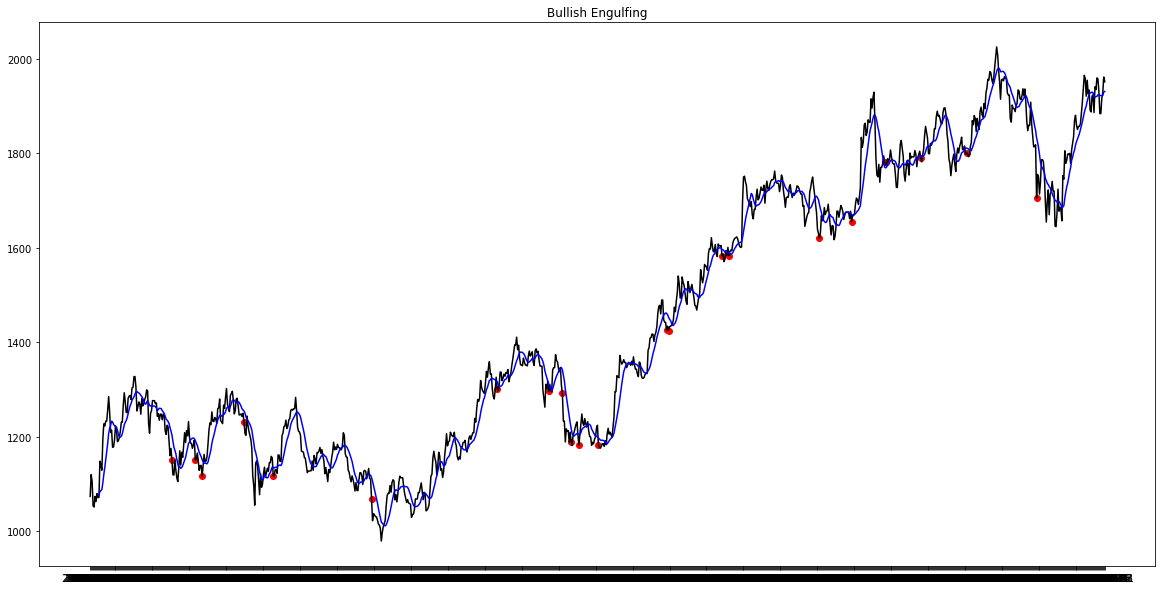

In [15]:
bul_eglf_arr = []
for c in range(2,len(housing_data['Close'])):
    cscore,cpattern=0,''
    lst_2=[housing_data['Open'].iloc[c-2],housing_data['High'].iloc[c-2],housing_data['Low'].iloc[c-2],housing_data['Close'].iloc[c-2]]
    lst_1=[housing_data['Open'].iloc[c-1],housing_data['High'].iloc[c-1],housing_data['Low'].iloc[c-1],housing_data['Close'].iloc[c-1]]
    lst_0=[housing_data['Open'].iloc[c],housing_data['High'].iloc[c],housing_data['Low'].iloc[c],housing_data['Close'].iloc[c]]
    if bul_eglf(lst_0,lst_1,lst_2) and moving_10[c]<moving_10[c-1]:
        bul_eglf_arr.append(c)
            
plt.figure(figsize=(20,10))
plt.plot(housing_data.index,housing_data['Close'],color='black')
plt.scatter(housing_data.index[bul_eglf_arr],housing_data['Close'][bul_eglf_arr],color='red')
plt.plot(housing_data.index,moving_10,color='blue')
plt.title('Bullish Engulfing')
plt.show()

In [32]:
print(moving_10[123])

1163.6662155000001


In [27]:
n_positive = 0
satisfy = []

for x in bul_eglf_arr:
  count = 0
  for y in range(x,min(x+10,len(moving_10))):
    if mom[y]>0:
      count+=1
  if count>=5:
    n_positive+=1
    satisfy.append(x)

print("Accuracy = ",n_positive/len(bul_eglf_arr)*100)
print(n_positive,len(bul_eglf_arr))

Accuracy =  72.72727272727273
16 22


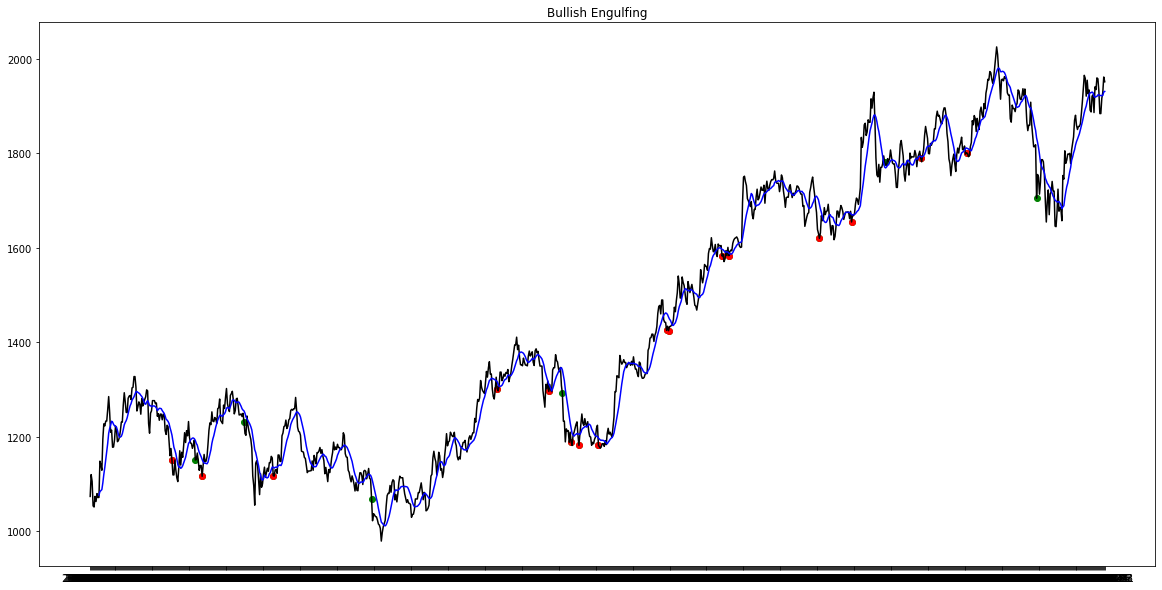

In [26]:
plt.figure(figsize=(20,10))
plt.plot(housing_data.index,housing_data['Close'],color='black')
plt.scatter(housing_data.index[bul_eglf_arr],housing_data['Close'][bul_eglf_arr],color='green')
plt.scatter(housing_data.index[satisfy],housing_data['Close'][satisfy],color='red')
plt.plot(housing_data.index,moving_10,color='blue')
plt.title('Bullish Engulfing')
plt.show()

In [0]:
def bear_eglf(lst_0,lst_1,lst_2):    
    
    O_0,H_0,L_0,C_0=lst_0[0],lst_0[1],lst_0[2],lst_0[3]
    O_1,H_1,L_1,C_1=lst_1[0],lst_1[1],lst_1[2],lst_1[3]
    O_2,H_2,L_2,C_2=lst_2[0],lst_2[1],lst_2[2],lst_2[3]
    
    return (O_1 > C_1) & (C_0 > O_0) & (C_0 >= O_1) & (C_1 >= O_0) & ((C_0 - O_0) > (O_1 - C_1 ))

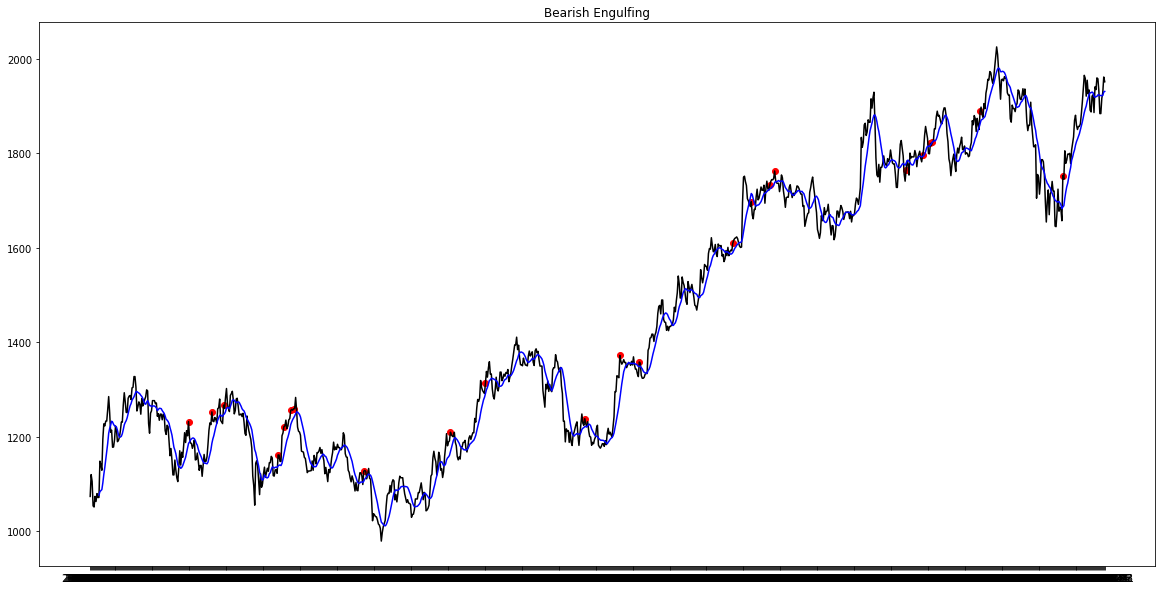

In [35]:
bear_eglf_arr = []
for c in range(2,len(housing_data['Close'])):
    lst_2=[housing_data['Open'].iloc[c-2],housing_data['High'].iloc[c-2],housing_data['Low'].iloc[c-2],housing_data['Close'].iloc[c-2]]
    lst_1=[housing_data['Open'].iloc[c-1],housing_data['High'].iloc[c-1],housing_data['Low'].iloc[c-1],housing_data['Close'].iloc[c-1]]
    lst_0=[housing_data['Open'].iloc[c],housing_data['High'].iloc[c],housing_data['Low'].iloc[c],housing_data['Close'].iloc[c]]
    if bear_eglf(lst_0,lst_1,lst_2) and moving_10[c]>moving_10[c-1]:
        bear_eglf_arr.append(c)
            
plt.figure(figsize=(20,10))
plt.plot(housing_data.index,housing_data['Close'],color='black')
plt.scatter(housing_data.index[bear_eglf_arr],housing_data['Close'][bear_eglf_arr],color='red')
plt.plot(housing_data.index,moving_10,color='blue')
plt.title('Bearish Engulfing')
plt.show()